# Performance comparison of different approches

In this notebook, we generate the figures allowing to compare the performances of the different approaches.

In [48]:
import glob
import os
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm_notebook as tqdm
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-dark')
import seaborn as sns
import sys
sys.path.append("../../..")
import scipy.stats

In [49]:
def sample_in_circle(nb_points):
    """
    This function allows to sample random points inside a circle using rejection sampling.
    """
    i = 0
    X = np.ndarray((nb_points, 2))
    while not i == nb_points:
        sample = np.random.uniform(-1, 1, 2)
        if np.linalg.norm(sample, ord=2) >1.:
            continue
        X[i] = sample
        i += 1
    return X

# We construct the histograms of achievable distribution
n_bins = 30
circ_samp = sample_in_circle(1000000)
hist_ab, _ = np.histogramdd(circ_samp, bins=n_bins, range=np.array([[-1]*2, [1]*2]).T)
hist_ab = hist_ab.astype(np.bool).astype(np.float)
hist_aa = np.tile(hist_ab.reshape(30,30,1), 30)

def kl_cov(X_s):
    n_samples, n_dim = X_s.shape
    histp , _ = np.histogramdd(X_s, bins=n_bins, range=np.array([[-1]*n_dim, [1]* n_dim]).T)
    if config['environment'] == 'armball':
        histq = hist_ab
    else:
        histq = hist_aa
    histq = histq.ravel()    
    histp = histp.ravel()
    return scipy.stats.entropy(histp, histq)

In [50]:
folders = ['results/{}'.format(fil) for fil in os.listdir('./results') if os.path.isdir('results/{}'.format(fil)) 
           and fil[0] == "R"]

dataset = pd.DataFrame()

for fold in tqdm(folders):
    try:          
        with open(os.path.join(fold, "config.json")) as f:
            config = json.load(f)

        with open(os.path.join(fold, "explored_states_history.pkl"), 'rb') as f:
            explored_states = pickle.load(f)
        
    except Exception as e:
        print("Folder %s failed with exception %s"%(fold, str(e)))
        continue
    
    for i in range(49):
        serie = copy.copy(config)
        serie.update({'epoch': (i+1)*10*10})
        serie.update({'klc': kl_cov(explored_states[i*10])})        
        dataset = dataset.append(serie, ignore_index=True)

ds = dataset['name'].str.extract("^(.*)\s(Armball|Armarrow)")
dataset["algorithm"] = ds[0]

A Jupyter Widget

/home/apere/anaconda3/envs/py-2.7/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


## Armball with small latent size

<IPython.core.display.Javascript object>


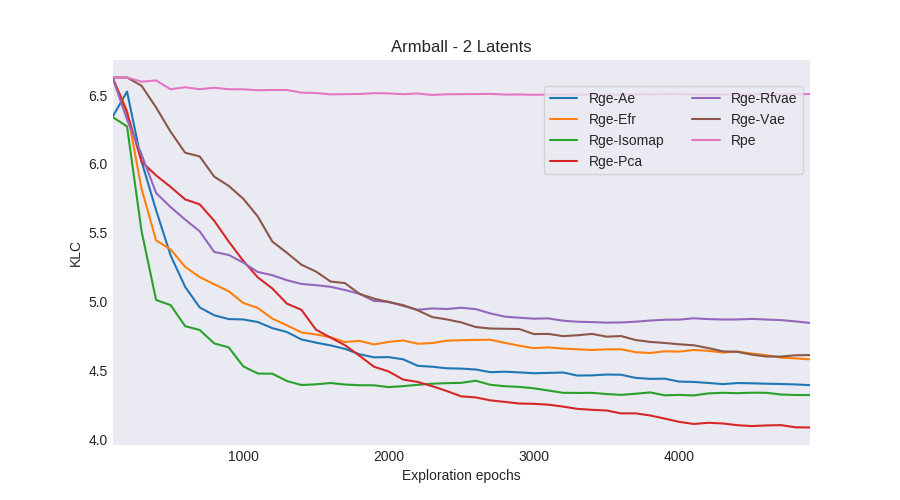

In [59]:
# We retrieve Dataset
env = "armball"
sampling = "normal"
nlatents = 10
ds = dataset.query('environment==@env and sampling!=@sampling and nlatents!=@nlatents').sort_values(['algorithm'])
ds = ds.drop_duplicates(subset=["epoch", "name"])

# We plot the figure
plt.figure(figsize=(9,5))
sns.tsplot(data=ds, time='epoch', value='klc',unit='name', condition='algorithm', ci=90)
plt.ylabel('KLC')
plt.xlabel("Exploration epochs")
plt.title("Armball - 2 Latents")
plt.legend(title="", loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(1., .95));

## Armball with large latent size

<IPython.core.display.Javascript object>


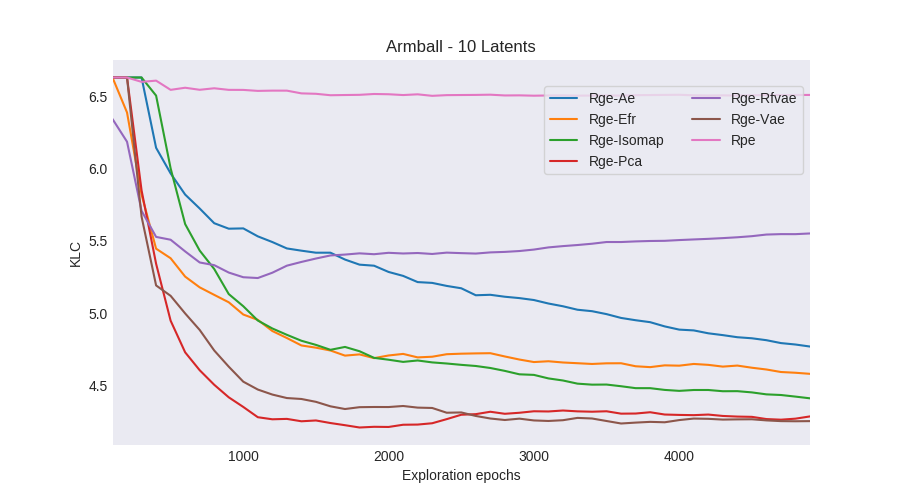

In [58]:
# We retrieve Dataset
env = "armball"
sampling = "normal"
nlatents = 2
ds = dataset.query('environment==@env and sampling!=@sampling and nlatents!=@nlatents').sort_values(['algorithm'])
ds = ds.drop_duplicates(subset=["epoch", "name"])

# We plot the figure
plt.figure(figsize=(9,5))
sns.tsplot(data=ds, time='epoch', value='klc',unit='name', condition='algorithm', ci=90)
plt.ylabel('KLC')
plt.xlabel("Exploration epochs")
plt.title("Armball - 10 Latents")
plt.legend(title="", loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(1., .95));

## Armarrow with small latent size

<IPython.core.display.Javascript object>


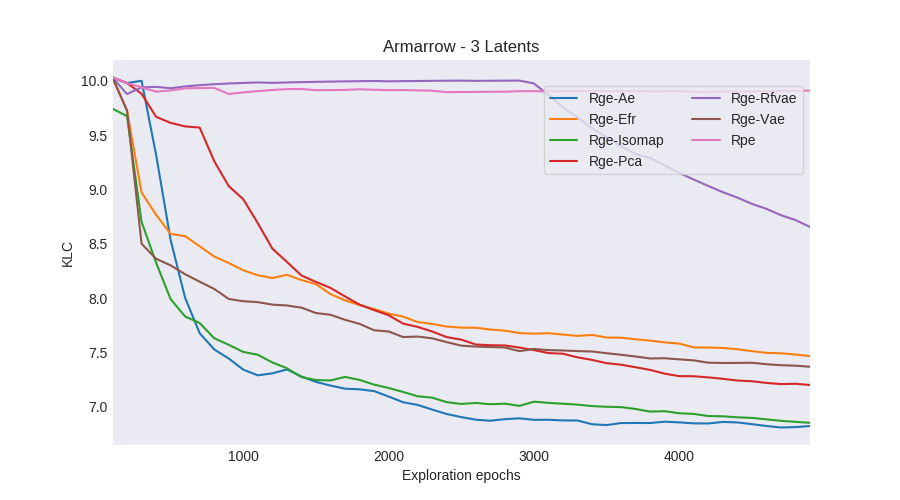

In [61]:
# We retrieve Dataset
env = "armarrow"
sampling = "normal"
nlatents = 10
ds = dataset.query('environment==@env and sampling!=@sampling and nlatents!=@nlatents').sort_values(['algorithm'])
ds = ds.drop_duplicates(subset=["epoch", "name"])

# We plot the figure
plt.figure(figsize=(9,5))
sns.tsplot(data=ds, time='epoch', value='klc',unit='name', condition='algorithm', ci=90)
plt.ylabel('KLC')
plt.xlabel("Exploration epochs")
plt.title("Armarrow - 3 Latents")
plt.legend(title="", loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(1., .95));

## Armarrow with large latent size

<IPython.core.display.Javascript object>


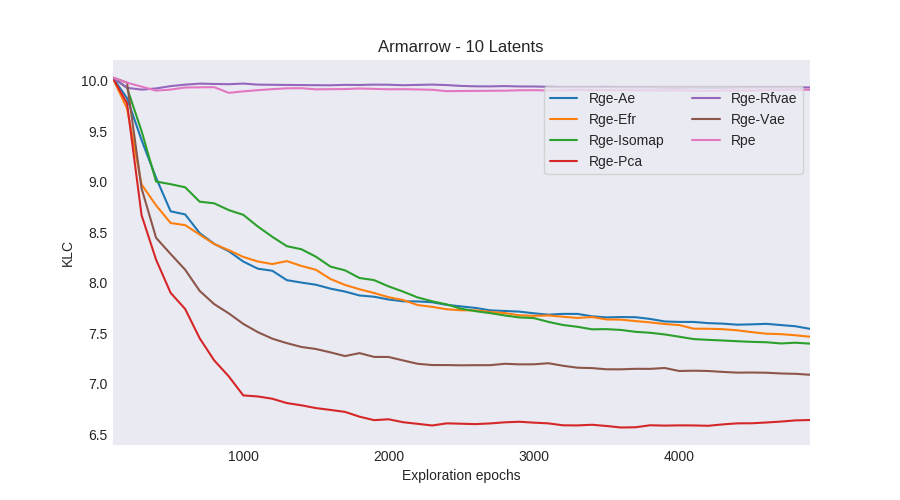

In [62]:
# We retrieve Dataset
env = "armarrow"
sampling = "normal"
nlatents = 3
ds = dataset.query('environment==@env and sampling!=@sampling and nlatents!=@nlatents').sort_values(['algorithm'])
ds = ds.drop_duplicates(subset=["epoch", "name"])

# We plot the figure
plt.figure(figsize=(9,5))
sns.tsplot(data=ds, time='epoch', value='klc',unit='name', condition='algorithm', ci=90)
plt.ylabel('KLC')
plt.xlabel("Exploration epochs")
plt.title("Armarrow - 10 Latents")
plt.legend(title="", loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(1., .95));

## RGE-VAE: Estimated Distribution vs Gaussian Distribution

<IPython.core.display.Javascript object>


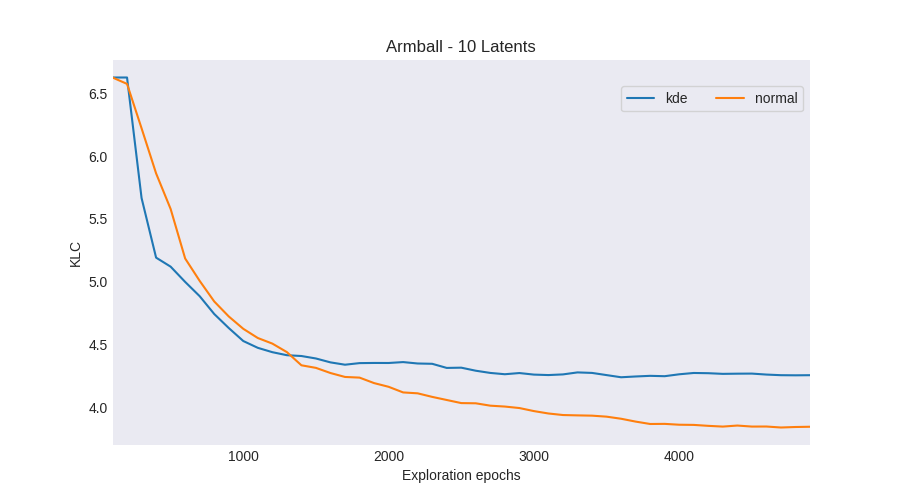

In [77]:
# We retrieve Dataset
env = "armball"
embedding= "vae"
nlatents = 10
ds = dataset.query('environment==@env and embedding==@embedding and nlatents==@nlatents').sort_values(['sampling'])
ds = ds.drop_duplicates(subset=["epoch", "name"])

# We plot the figure
plt.figure(figsize=(9,5))
sns.tsplot(data=ds, time='epoch', value='klc',unit='name', condition='sampling', ci=90)
plt.ylabel('KLC')
plt.xlabel("Exploration epochs")
plt.title("Armball - 10 Latents")
plt.legend(title="", loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(1., .95));